In [1]:
## imports 
import forest
from importlib import reload
reload(forest)
import os
from pandas import read_csv
import numpy as np

from datetime import datetime, timedelta

from multigrids import TemporalMultiGrid, TemporalGrid
import random_forest_tools as tools
reload(tools)
import matplotlib.pyplot as plt

data_dir = "/Users/rwspicer/Desktop/data/V1/"
feature_file = os.path.join(
    data_dir,
    "master-project/training/ACP/v1/temporal-multigrid/rf_traing_set_v1.yml"
)
label_file = os.path.join(
    data_dir,
    "thermokarst/initiation-regions/ACP/v3-1/PDM-5var/without_predisp/temporal-grid/ia_grid_5var.yml"
)

to_td = lambda x: timedelta(hours = int(x.split(':')[0]),minutes = int(x.split(':')[1]), seconds = float(x.split(':')[2]))
to_seconds = lambda x: int(x.split(':')[0]) *60 *60 + int(x.split(':')[1]) * 60 + float(x.split(':')[2])
to_min = lambda x: to_seconds(x) / 60
to_hour = lambda x: to_min(x) / 60


import pickle
import joblib
from pandas import DataFrame, read_csv

feature_importance_list = []
model_list = []

grid_names = ['fdd', 'tdd', 'tdd+1', 'ewp', 'fwp', 'sp', 'lsp', 'sp+1', 'lat', 'long','aspect','slope', 'elev' ]



def show_feature_importances(model, feature_list, show=False):
    # Get numerical feature importances
    importances = list(model.feature_importances_)
    # List of tuples with variable and importance
    feature_importances = [(feature, round(importance*100, 3)) for feature, importance in zip(feature_list, importances)]
    # Sort the feature importances by most important first
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    # Print out the feature and importances 
    if show:
        [print('{:20} {}%'.format(*pair)) for pair in feature_importances];
        
    feature_importances = {f[0]:f[1] for f in feature_importances} 
    return feature_importances

In [2]:
## load subsampled traing data
ss_data = pickle.load(open('ss_data.pkl', 'rb'))

In [3]:
## load grid data
training_data = TemporalMultiGrid(feature_file)
om = TemporalGrid(label_file)

list_of_models = [
    'rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp25.yml',
    'rfm_e50_md60_mfAUTO_mln50000_msl4_mss5_tdp25.yml',
    'rfm_e50_md60_mfAUTO_mln50000_msl4_mss5_tdp25.yml',
    'rfm_e10_md60_mfAUTO_mln50000_msl8_mss5_tdp50.yml',
    'rfm_e10_md60_mfAUTO_mln50000_msl8_mss2_tdp50.yml',
    'rfm_e10_md100_mfAUTO_mln50000_msl4_mss10_tdp50.yml',
    'rfm_e100_md25_mfAUTO_mln50000_msl4_mss10_tdp25.yml',
    'rfm_e100_md25_mfAUTO_mln50000_msl2_mss5_tdp25.yml',
    'rfm_e100_md25_mfAUTO_mln50000_msl2_mss2_tdp25.yml',
    'rfm_e50_md100_mfAUTO_mln50000_msl8_mss5_tdp75.yml',
    'rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp75.yml',
    'rfm_e50_md60_mfAUTO_mln50000_msl2_mss10_tdp75.yml',
]

In [4]:
### this trains and saves all of the models in turn

for m in list_of_models[1:]:
    print(m)
    settings = forest.RFParams(m)
    model = forest.create_model(ss_data['tdp25']['features'], ss_data['tdp25']['labels'], settings,2,4)
    model_list.append(m)

    l = show_feature_importances(model, grid_names)
    feature_importance_list.append(l)
    
    joblib.dump(model,  '/Volumes/toshi-stati/tk-rf-models/' + m.split('.')[0]+'.joblib') 

rfm_e50_md60_mfAUTO_mln50000_msl4_mss5_tdp25.yml


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 50building tree 2 of 50building tree 3 of 50


building tree 4 of 50


KeyboardInterrupt: 

In [5]:
fi_stats = read_csv('final_model_fi.csv', index_col=0)
fi_stats

,aspect,elev,ewp,fdd,fwp,lat,long,lsp,slope,sp,sp+1,tdd,tdd+1
rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp25.yml,0.001,0.002,4.970,4.883,38.839,11.251,12.106,5.256,0.075,3.698,3.777,5.406,9.737
rfm_e50_md60_mfAUTO_mln50000_msl4_mss5_tdp25.yml,0.002,0.003,4.982,4.890,38.800,11.244,12.102,5.266,0.076,3.708,3.786,5.408,9.732
rfm_e50_md60_mfAUTO_mln50000_msl4_mss5_tdp25.yml,0.002,0.003,4.982,4.890,38.800,11.244,12.102,5.266,0.076,3.708,3.786,5.408,9.732
rfm_e10_md60_mfAUTO_mln50000_msl8_mss5_tdp50.yml,0.002,0.002,4.944,4.884,38.814,11.278,12.189,5.209,0.074,3.666,3.748,5.426,9.763
rfm_e10_md60_mfAUTO_mln50000_msl8_mss2_tdp50.yml,0.002,0.002,4.944,4.884,38.814,11.278,12.189,5.209,0.074,3.666,3.748,5.426,9.763
rfm_e10_md100_mfAUTO_mln50000_msl4_mss10_tdp50.yml,0.002,0.002,4.956,4.891,38.776,11.270,12.184,5.221,0.075,3.681,3.757,5.427,9.757
rfm_e100_md25_mfAUTO_mln50000_msl4_mss10_tdp25.yml,0.002,0.003,4.995,4.891,38.825,11.228,12.079,5.281,0.073,3.723,3.768,5.396,9.736
rfm_e100_md25_mfAUTO_mln50000_msl2_mss5_tdp25.yml,0.002,0.003,4.999,4.893,38.812,11.226,12.078,5.285,0.074,3.726,3.771,5.397,9.735
rfm_e100_md25_mfAUTO_mln50000_msl2_mss2_tdp25.yml,0.003,0.003,4.999,4.893,38.812,11.226,12.078,5.284,0.074,3.725,3.771,5.397,9.735
rfm_e50_md100_mfAUTO_mln50000_msl8_mss5_tdp75.yml,0.001,0.002,4.970,4.883,38.839,11.251,12.106,5.256,0.075,3.698,3.777,5.406,9.737


In [57]:

def evaulte_model_statistically(model_file, om, year, model_name = ''):
    """
    """
    
    if type(model_file) is str:
        clf = joblib.load(model_file)
    else: 
        clf = model_file
        
    ov = clf.verbose
    clf.verbose = 0 
    new = tools.apply_model_to_year(clf, training_data, year, training_data.config['mask'])

#     tools.quick_coolwarm(om[year] , 'original model ' + str(year))
#     tools.quick_coolwarm(new , model_name + ' '+ str(year))

    
    diff = (new -om[year])
#     tools.to_figure(diff , '',  'comparison ' + str(year),cmap = 'coolwarm', vmin=-10,vmax=10, save=False)

    stats = {
        'min diff': np.nanmin(diff), 
        'max diff': np.nanmax(diff),
        'mean diff': np.nanmean(diff),
        'abs mean diff': np.nanmean(np.abs(diff)),
        'max abs diff': np.nanmax(np.abs(diff)),
        'min abs diff': np.nanmin(np.abs(diff)),
        'min predict':np.nanmin(new),
        'max predict':np.nanmax(new), 
    }
    clf.verbose = ov
    return stats

def evaulte_model_pictorially(model_file, om, year, model_name = ''):
    """
    """
    import pprint
    if type(model_file) is str:
        clf = joblib.load(model_file)
    else: 
        clf = model_file
        
    ov = clf.verbose
    clf.verbose = 0
    new = tools.apply_model_to_year(clf, training_data, year, training_data.config['mask'])

#     tools.quick_coolwarm(om[year] , 'original model ' + str(year))
#     tools.quick_coolwarm(new , model_name + ' '+ str(year))

    tools.to_figure(om[year] , 'original model ' + str(year),cmap = 'coolwarm', vmin=-40,vmax=40, save=False)
    tools.to_figure(new , model_name + ' '+ str(year),cmap = 'coolwarm', vmin=-40,vmax=40, save=False)



    
    diff = (new -om[year])
    tools.to_figure(diff , '',  'comparison ' + str(year),cmap = 'coolwarm', vmin=-10,vmax=10, save=False)

    stats = evaulte_model_statistically(clf, om, year, model_name)
    pprint.pprint(stats)
    
#     print ('min diff:', np.nanmin(diff), 'max diff:', np.nanmax(diff))
#     print ('mean diff:', np.nanmean(diff), 'abs mean diff:', np.nanmean(np.abs(diff)))
    clf.verbose = ov
    return clf




------------------------------------------------------------
rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp25


KeyboardInterrupt: 

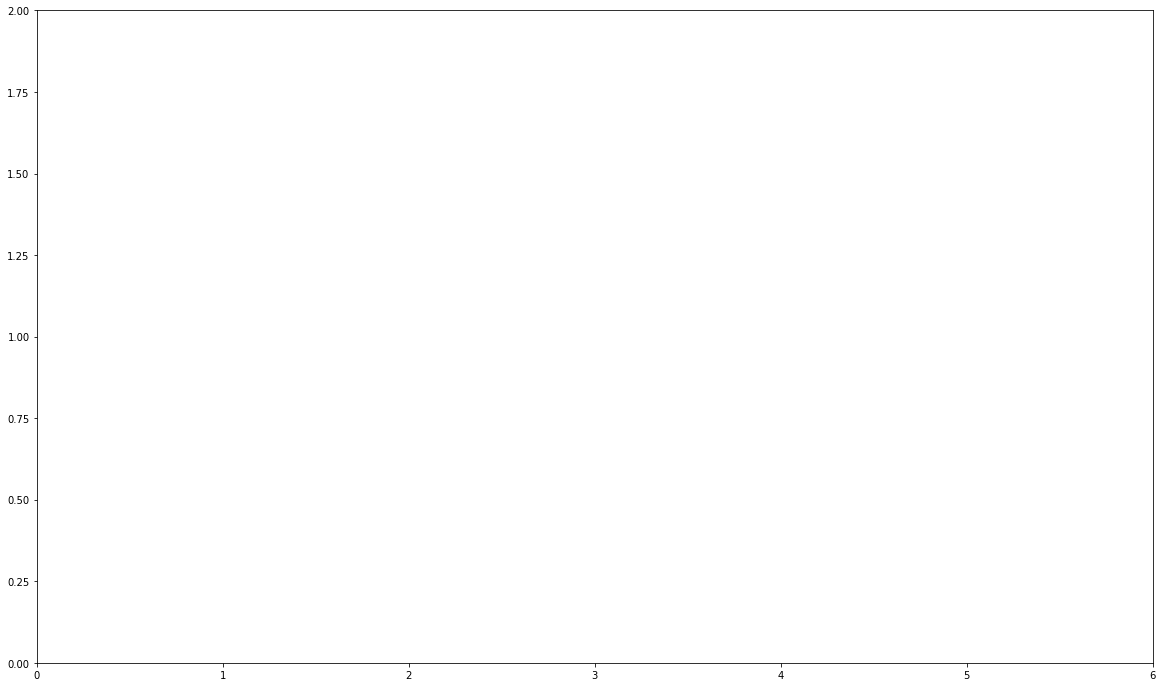

In [35]:
import glob
model_files = glob.glob('/Volumes/toshi-stati/tk-rf-models/*.joblib')

data_frames = {}

fig, ax = plt.subplots(figsize = (20, 12))
ax.axis([0, 6, 0, 2])
for fp in model_files:
    print('-'*60)
    mn = fp.split('/')[-1][:-7]
    print(mn)
    ys = []
    for year in range(1905,2016,5):
#         print ("For year", year, ":")
        s = evaulte_model_statistically(fp, om, year, mn)
        s['year'] = year
        ys.append(s)
    
    df = DataFrame(ys)
    data_frames[mn] = df
    df.plot.line(x='year', y='abs mean diff', label = mn, ax=ax )
#     print('-'*60, '\n')


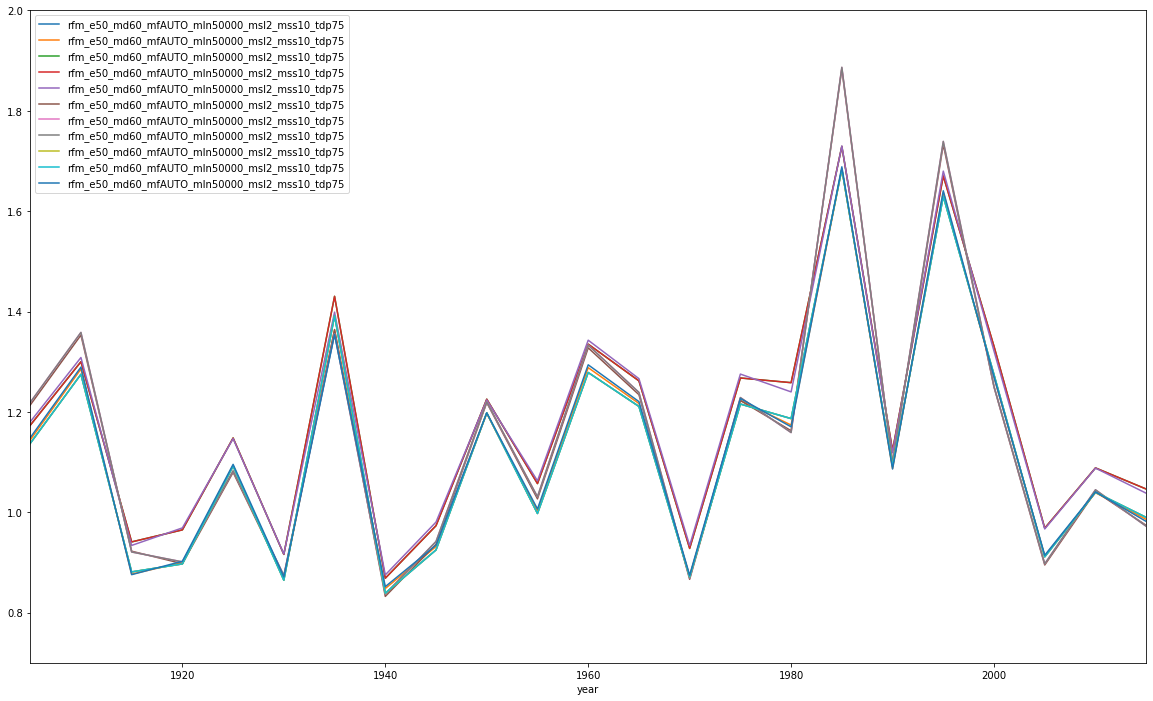

In [18]:
fig, ax = plt.subplots(figsize = (20, 12))
ax.axis([0, 6, .7, 2])
for df in data_frames:
    data_frames[df].plot.line(x='year', y='abs mean diff', label = mn, ax=ax )

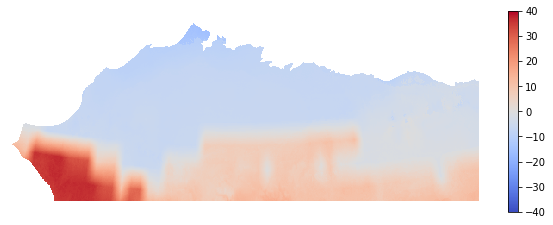

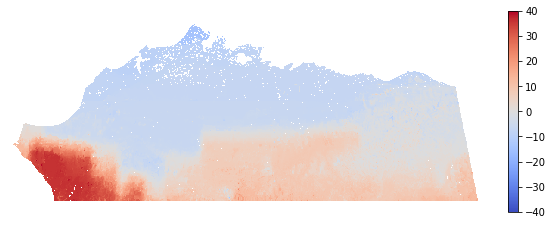

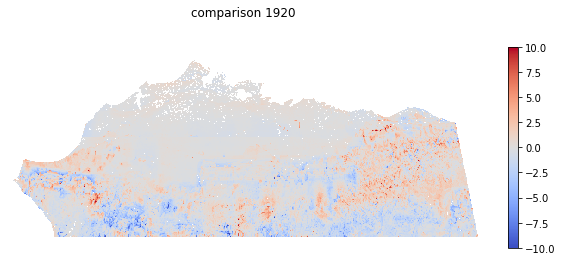

{'abs mean diff': 0.8970711667635464,
 'max abs diff': 20.840669848217583,
 'max diff': 14.477389235389854,
 'max predict': 40.823785160007446,
 'mean diff': -0.03011263005236788,
 'min abs diff': 3.843049191321057e-06,
 'min diff': -20.840669848217583,
 'min predict': -14.15606428509089}


In [62]:
fp = evaulte_model_pictorially(fp, om, 1920, mn)